資料來源：https://www.kaggle.com/c/dogs-vs-cats/data

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

path="/Users/z88756212/Documents/AI/python/dogs-vs-cats"
print(os.listdir(path))

['.DS_Store', 'sampleSubmission.csv', 'test1', 'path_to_save_model', 'test1.zip', 'train', '.ipynb_checkpoints', 'Cats and dogs.ipynb', 'train.zip']


In [4]:
filenames = os.listdir("/Users/z88756212/Documents/AI/python/dogs-vs-cats/train")
data = []
for filename in filenames:
    
    if "cat" in filename:
        label = "cat"
    elif "dog" in filename:
        label = "dog"
    else:
        label = "unknown" 

    data.append({"filename": filename, "label": label})

df = pd.DataFrame(data)

print(df)

            filename label
0       dog.8011.jpg   dog
1       cat.5077.jpg   cat
2       dog.7322.jpg   dog
3       cat.2718.jpg   cat
4      cat.10151.jpg   cat
...              ...   ...
24995   dog.8008.jpg   dog
24996   dog.1992.jpg   dog
24997  dog.12412.jpg   dog
24998   cat.2701.jpg   cat
24999  cat.10148.jpg   cat

[25000 rows x 2 columns]


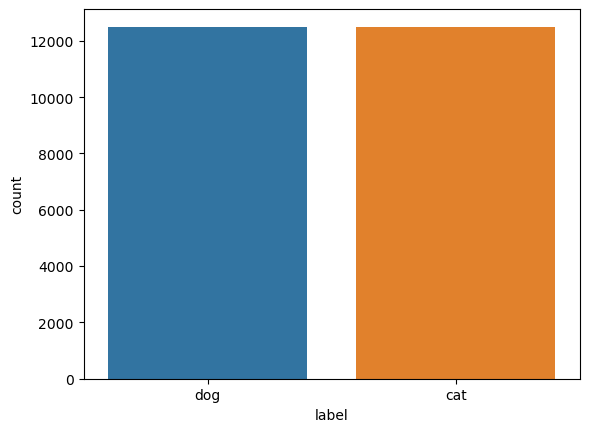

In [6]:
sns.countplot(x="label", data=df); 

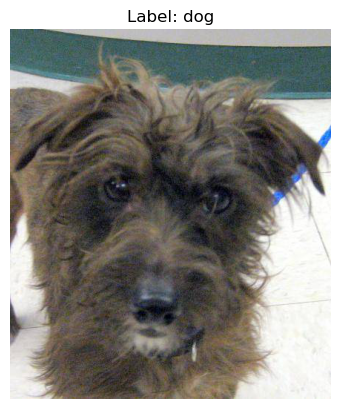

In [8]:
image_dir = "/Users/z88756212/Documents/AI/python/dogs-vs-cats/train"
random_row = df.sample(n=1).iloc[0] 
image_path = os.path.join(image_dir, random_row["filename"])
label = random_row["label"]

img = Image.open(image_path)
plt.imshow(img)
plt.title(f"Label: {label}")
plt.axis("off")  
plt.show()

In [10]:
label_map = {'dog': 1, 'cat': 0}
#將 label_map 的映射應用於 df['label'] 
df['label'] = df['label'].map(label_map).astype(str)
print(df.head())

        filename label
0   dog.8011.jpg     1
1   cat.5077.jpg     0
2   dog.7322.jpg     1
3   cat.2718.jpg     0
4  cat.10151.jpg     0


In [12]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [14]:
train_df,validate_df

(            filename label
 0      cat.11282.jpg     0
 1       cat.7693.jpg     0
 2       cat.4977.jpg     0
 3       dog.9403.jpg     1
 4      cat.10150.jpg     0
 ...              ...   ...
 19995   dog.2721.jpg     1
 19996   dog.3974.jpg     1
 19997  dog.10427.jpg     1
 19998    cat.731.jpg     0
 19999   dog.6540.jpg     1
 
 [20000 rows x 2 columns],
            filename label
 0      cat.1474.jpg     0
 1     dog.11287.jpg     1
 2      dog.8276.jpg     1
 3      cat.7227.jpg     0
 4      cat.2997.jpg     0
 ...             ...   ...
 4995   cat.7991.jpg     0
 4996   dog.9208.jpg     1
 4997   cat.5676.jpg     0
 4998   cat.9901.jpg     0
 4999   dog.9535.jpg     1
 
 [5000 rows x 2 columns])

<Axes: xlabel='label'>

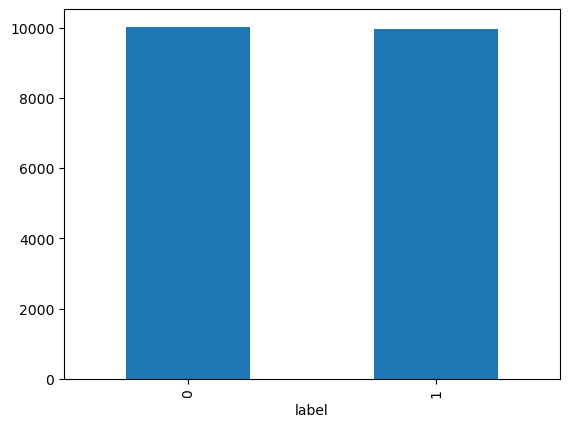

In [16]:
train_df['label'].value_counts().plot.bar()

<Axes: xlabel='label'>

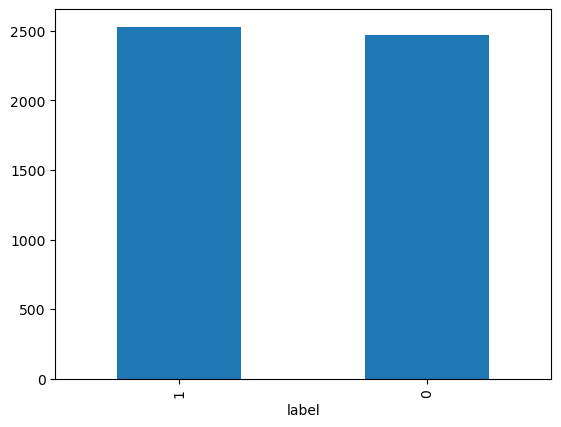

In [18]:
validate_df['label'].value_counts().plot.bar()

# 資料擴增

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#像素縮放、旋轉、水平垂直平移、圖像剪切、縮放圖像、隨機水平翻轉、填補素質
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)


train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(180, 180),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_dataframe(
    validate_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(180, 180),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [22]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Rescaling
from keras.layers import Conv2D , MaxPooling2D , Dropout, Flatten , Dense, Activation


model = Sequential()
model.add(Rescaling(1.0/255,input_shape=(180, 180, 3)))
model.add(Conv2D(filters=32, kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=3,activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=3,activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', kernel_initializer="he_normal"))

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 85, 85, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 38, 38, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46208)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,957,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,237,249 (12.35 MB)

 Trainable params: 3,237,249 (12.35 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [31]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 369s 588ms/step - accuracy: 0.4964 - loss: 0.6934 - val_accuracy: 0.4944 - val_loss: 0.6933
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 371s 593ms/step - accuracy: 0.5035 - loss: 0.6932 - val_accuracy: 0.4944 - val_loss: 0.6932
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 373s 597ms/step - accuracy: 0.4952 - loss: 0.6932 - val_accuracy: 0.4944 - val_loss: 0.6932
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 370s 591ms/step - accuracy: 0.4923 - loss: 0.6932 - val_accuracy: 0.4944 - val_loss: 0.6933
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 375s 600ms/step - accuracy: 0.5060 - loss: 0.6931 - val_accuracy: 0.4944 - val_loss: 0.6932
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 373s 597ms/step - accuracy: 0.4997 - loss: 0.6931 - val_accuracy: 0.5056 - val_loss: 0.6931
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 372s 595ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.4944 - val_loss: 0.6932
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 373s 596ms/step - accuracy: 0.5017 -

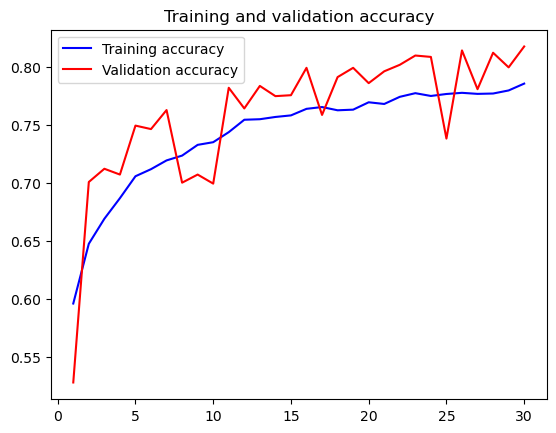

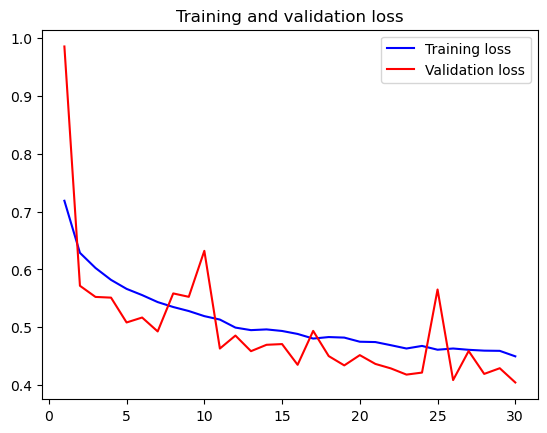

In [213]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, color='b', label="Training accuracy")
plt.plot(epochs, val_accuracy, color='r', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, color='b', label="Training loss")
plt.plot(epochs, val_loss, color='r', label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# 資料擴增調整

In [65]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)


train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(180, 180),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_dataframe(
    validate_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(180, 180),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [95]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Rescaling
from keras.layers import  BatchNormalization , Conv2D , MaxPooling2D , Dropout, Flatten , Dense, Activation
from tensorflow.keras.optimizers import Adam



model = Sequential()
model.add(Rescaling(1.0/255,input_shape=(180, 180, 3)))
model.add(Conv2D(filters=32, kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.4)) 
model.add(Dense(1, activation='sigmoid', kernel_initializer="he_normal"))




model.compile(
    optimizer=Adam(learning_rate=1e-5),                 
    loss='binary_crossentropy',       
    metrics=['accuracy']             
)

In [97]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 87, 87, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 18, 18, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,044,801 (11.61 MB)

 Trainable params: 3,043,841 (11.61 MB)

 Non-trainable params: 960 (3.75 KB)

In [99]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
]
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=valid_generator,
    callbacks=callbacks
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 345s 548ms/step - accuracy: 0.5716 - loss: 0.7997 - val_accuracy: 0.5282 - val_loss: 0.9856 - learning_rate: 1.0000e-05
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 347s 554ms/step - accuracy: 0.6412 - loss: 0.6370 - val_accuracy: 0.7010 - val_loss: 0.5718 - learning_rate: 1.0000e-05
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 349s 557ms/step - accuracy: 0.6576 - loss: 0.6107 - val_accuracy: 0.7124 - val_loss: 0.5526 - learning_rate: 1.0000e-05
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 356s 569ms/step - accuracy: 0.6813 - loss: 0.5882 - val_accuracy: 0.7074 - val_loss: 0.5513 - learning_rate: 1.0000e-05
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 353s 564ms/step - accuracy: 0.7058 - loss: 0.5710 - val_accuracy: 0.7496 - val_loss: 0.5084 - learning_rate: 1.0000e-05
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 389s 622ms/step - accuracy: 0.7089 - loss: 0.5573 - val_accuracy: 0.7466 - val_loss: 0.5169 - learning_rate: 1.0000e-05
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 

In [100]:
model.save('path_to_save_model/my_model.keras')

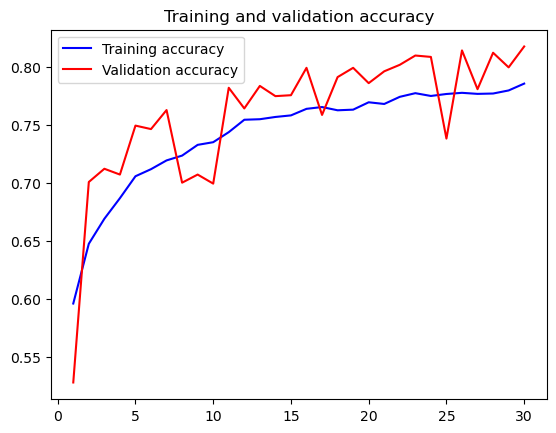

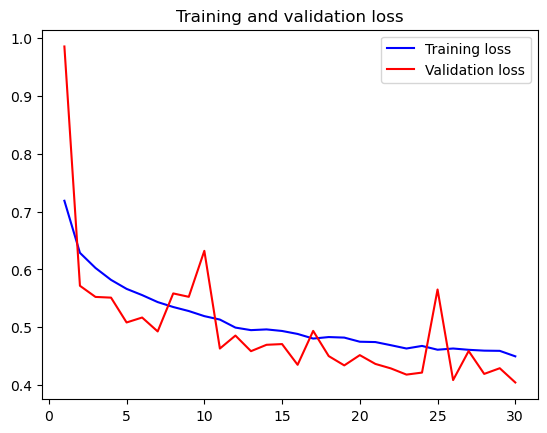

In [216]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color='b', label="Training accuracy")
plt.plot(epochs, val_accuracy, color='r', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, color='b', label="Training loss")
plt.plot(epochs, val_loss, color='r', label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()